In [5]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import os

In [6]:
# train_data = np.loadtxt("./data/galaxies_train.csv", delimiter=",", skiprows=1)
# test_data = np.loadtxt("./data/galaxies_test.csv", delimiter=",", skiprows=1)

# train_data = np.loadtxt("D:\\Uddannelse\\Datalogi\\KU\\2_aar\\MAD\\MAD2021\\2022_Exam\\Exam_REPLACEMENT\\exam_data_replacement\\data\\galaxies_train.csv", delimiter=",", skiprows=1)
# test_data = np.loadtxt("D:\\Uddannelse\\Datalogi\\KU\\2_aar\\MAD\\MAD2021\\2022_Exam\\Exam_REPLACEMENT\\exam_data_replacement\\data\\galaxies_test.csv", delimiter=",", skiprows=1)
f = []
for (dirpath, dirnames, filenames) in os.walk("."):
    f.extend(filenames)
    break
print(f)
print()


train_data = np.loadtxt("./galaxies_train.csv", delimiter=",", skiprows=1)
test_data = np.loadtxt("./galaxies_test.csv", delimiter=",", skiprows=1)

X_train = train_data[:,1:]
t_train = train_data[:,0]
X_test = test_data[:,1:]
t_test = test_data[:,0]
print("Number of training instances: %i" % X_train.shape[0])
print("Number of test instances: %i" % X_test.shape[0])
print("Number of attributes: %i" % X_train.shape[1])
print()
print('X_train shape', X_train.shape)
print('t_train shape', t_train.shape)
print()
print('X_test shape', X_test.shape)
print('t_test shape', t_test.shape)

['accent-mfcc-data_shuffled_train.txt', 'accent-mfcc-data_shuffled_validation.txt', 'Galaxies_kNN.ipynb', 'Galaxies_LinRegNeighbors.ipynb', 'galaxies_test.csv', 'galaxies_train.csv', 'q6.py', 'q7_clustering.py', 'q7_PCA.py', 'regression.py', 'seedsDataset.txt', 'test.py']

Number of training instances: 500
Number of test instances: 500
Number of attributes: 10

X_train shape (500, 10)
t_train shape (500,)

X_test shape (500, 10)
t_test shape (500,)


In [7]:
# NOTE: You are supposed to use this strucuture, i.e., 
# the pre-defined functions and variables. If you 
# have difficulties to keep this structure, you ARE 
# ALLOWED to adapt/change the code structure slightly!
# You might also want to add additional functions or
# variables.

class NearestNeighborRegressor:
    
    def __init__(self, n_neighbors=1, dist_measure="euclidean", dist_matrix=None):
        """
        Initializes the model.
        
        Parameters
        ----------
        n_neighbors : The number of nearest neigbhors (default 1)
        dist_measure : The distance measure used (default "euclidean")
        dist_matrix : The distance matrix if needed (default "None")
        """
        
        self.n_neighbors = n_neighbors
        self.dist_measure = dist_measure
        self.dist_matrix = dist_matrix

        #print(self.n_neighbors)
        #print(self.dist_measure)
        #print(self.dist_matrix)

    def fit(self, X, t):
        """
        Fits the nearest neighbor regression model.

        Parameters
        ----------
        X : Array of shape [n_samples, n_features]
        t : Array of length n_samples
        """ 
        
        self.X_train = X
        self.t_train = t

        #print(self.X_train)
        #print(self.t_train)

    def predict(self, X):
        """
        Computes predictions for a new set of points.

        Parameters
        ----------
        X : Array of shape [n_samples, n_features]

        Returns
        -------
        predictions : Array of length n_samples
        """         
        
        predictions = []
        
        # TODO: ADD YOUR CODE HERE
        for i in range(np.size(X_test, 0)):
            distance_arr = np.empty(np.size(X,0))
            for j in range(np.size(X, 0)):
                distance = np.linalg.norm(X_test[i] - X[j])
                distance_arr[j] = distance
            sorted_distances = distance_arr.argsort()
            pred_value = t_train[sorted_distances[0:self.n_neighbors]]

            prediction_calc = np.sum(pred_value) / self.n_neighbors
            predictions.append(prediction_calc)

        return predictions

    def predict_Matrix(self, X):
        """
    Computes predictions for a new set of points.

    Parameters
    ----------
    X : Array of shape [n_samples, n_features]

    Returns
    -------
    predictions : Array of length n_samples
    """         
        predictions = []
        
        # TODO: ADD YOUR CODE HERE
        for i in range(np.size(X_test, 0)):
            distance_arr = np.empty(np.size(X,0))
            for j in range(np.size(X, 0)):
                distance = np.linalg.norm((X_test[i,:] - X[j,:]).T * self.dist_matrix * (X_test[i,:] - X[j,:]))
                distance_arr[j] = distance

            sorted_distances = distance_arr.argsort()
            pred_value = t_train[sorted_distances[0:self.n_neighbors]]

            prediction_calc = np.sum(pred_value) / self.n_neighbors
            predictions.append(prediction_calc)
            
        return predictions
    

length of prediction arr 500
RMSE value: 0.8243064553494784


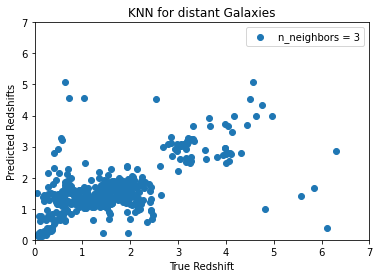

RMSE with Matrix value: 1.1005192053827482


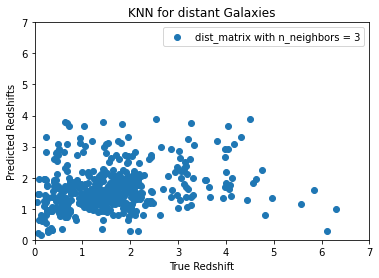

In [8]:
# TODO: ADD YOUR CODE HERE
def RMSE(t,tp):
    return np.sqrt(np.square(np.subtract(t,tp)).mean())


model_knn = NearestNeighborRegressor(n_neighbors=3)
model_knn.fit(X_train, t_train)
preds = model_knn.predict(X_train)
print("length of prediction arr", len(preds))
print("RMSE value:", RMSE(t_test, preds))

x_values = t_test
y_values = preds
plt.title('KNN for distant Galaxies')
plt.xlabel('True Redshift')
plt.ylabel('Predicted Redshifts')
plt.scatter(x_values,y_values, label="n_neighbors = 3")
plt.legend(loc="upper right")
plt.xlim(0,7)
plt.ylim(0,7)
plt.show()


#Semi definite matrix M
M = np.zeros(100).reshape(10,10)
diag_values = np.array([0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,1.0,1.0])
np.fill_diagonal(M, diag_values)

model_knn_two = NearestNeighborRegressor(n_neighbors=3, dist_matrix=M)
model_knn_two.fit(X_train, t_train)
preds2 = model_knn_two.predict_Matrix(X_train)

print("RMSE with Matrix value:", RMSE(t_test, preds2))


x_values = t_test
y_values = preds2
plt.title('KNN for distant Galaxies')
plt.xlabel('True Redshift')
plt.ylabel('Predicted Redshifts')
plt.scatter(x_values,y_values, label="dist_matrix with n_neighbors = 3")
plt.legend(loc="upper right")
plt.xlim(0,7)
plt.ylim(0,7)
plt.show()
